# Assignment 1

## 1. Moore's Law
*Use the scripts from here to download a large amount of data relating to CPU specs.*

1. *Extract the date and base speed for a benchmark of your choice. Note that the dates contained as part of the testID don't tell us about when the hardware was actually designed, so the test could have been run at a much later date using older hardware. We therefore need the date indicating when the hardware was first available (hwAvail) from the summaries file to really test Moore's Law.*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
benchmarks = pd.read_csv('benchmarks.txt', low_memory=False)

# extract date from testID
date = benchmarks.testID.str.split('-').str[1]

# convert test date to datetime
newdate = [0 for i in range(len(date))]

for i in range(len(date)):
    d = str(date[i])
    if len(d)==4: # some don't have dates
        newdate[i] = float("NaN")
    elif(d=='nan'):
        newdate[i] = float("NaN")
    elif len(d)==6: # some are missing the "19" in the 90s
        d = '19'+ d
        newdate[i] = datetime.datetime.strptime(d, "%Y%m%d")
    else:
        newdate[i] = datetime.datetime.strptime(d, "%Y%m%d")
    

df = benchmarks.copy() # create new df with dates
df['testDate'] = newdate

df = df[df['benchName']=='179.art'] # choose benchmark
df = df.dropna() # drop null values
df = df.sort_values(by=['testDate']) # sort by date

df

,testID,benchName,base,peak,testDate
10008,cpu2000-19991130-00006,179.art,1238.0,1564,1999-11-30
10060,cpu2000-19991130-00010,179.art,759.0,900,1999-11-30
10086,cpu2000-19991130-00012,179.art,1245.0,1566,1999-11-30
10190,cpu2000-19991130-00020,179.art,800.0,769,1999-11-30
10268,cpu2000-19991130-00028,179.art,305.0,412,1999-11-30
...,...,...,...,...,...
45712,cpu2000-20070222-08642,179.art,7486.0,7451,2007-02-22
45766,cpu2000-20070222-08654,179.art,7379.0,7456,2007-02-22
45806,cpu2000-20070223-08665,179.art,7483.0,7459,2007-02-23
45780,cpu2000-20070223-08659,179.art,7522.0,7455,2007-02-23


In [3]:
summaries = pd.read_csv('summaries.txt', encoding = 'unicode-escape')

# convert date when hardware was available (hwAvail) to datetime
summaries['hwAvail'] = pd.to_datetime(summaries['hwAvail'])

# merge summaries to benchmark dataframe
df2 = pd.merge(df, summaries, on="testID")

df2

,testID,benchName,base_x,peak_x,testDate,tester,machine,cpu,mhz,hwAvail,os,compiler,autoParallel,benchType,base_y,peak_y
0,cpu2000-19991130-00006,179.art,1238.0,1564,1999-11-30,Compaq NH,AlphaServer ES40 Model 6/667,Alpha 21264A,667.0,2000-02-01,Tru64 UNIX V4.0F,Compaq C X6.2-259-449AT Compaq Fortran T5.3 (f...,No,CFP2000,500.0,562
1,cpu2000-19991130-00010,179.art,759.0,900,1999-11-30,Compaq NH,AlphaServer DS20 Model 6/500,Alpha 21264,500.0,1998-12-01,Tru64 UNIX V4.0F,Compaq C X6.2-259-449AT Compaq Fortran T5.3 (f...,No,CFP2000,383.0,422
2,cpu2000-19991130-00012,179.art,1245.0,1566,1999-11-30,Compaq NH,AlphaServer DS20E Model 6/667,Alpha 21264A,667.0,2000-03-01,Tru64 UNIX V4.0F,Compaq C X6.2-259-449AT Compaq Fortran T5.3 (f...,No,CFP2000,514.0,577
3,cpu2000-19991130-00020,179.art,800.0,769,1999-11-30,SGI,SGI 2200 2X 300MHz R12k,R12000,300.0,1999-04-01,IRIX 6.5.5f,"MIPSpro 7.3 C, C++, Fortran90",No,CFP2000,269.0,283
4,cpu2000-19991130-00028,179.art,305.0,412,1999-11-30,Hewlett-Packard Company,HP 9000 Model N4000,440 MHz PA-RISC 8600,440.0,1999-11-01,HP-UX B.11.00,HP-UX f77 971027 (162928) B.11.00.01,No,CFP2000,266.0,297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,cpu2000-20070222-08642,179.art,7486.0,7451,2007-02-22,Hewlett-Packard Company,"ProLiant BL20p G4 (1.86 GHz, Intel Xeon proces...","Intel Xeon processor E5320 (1.86 GHz, 2x4 MB L...",1860.0,2007-01-01,SuSE Linux Enterprise Server 10 (x86_64) Kerne...,Intel C++ Compiler for EM64T-based application...,No,CFP2000,1909.0,2087
1266,cpu2000-20070222-08654,179.art,7379.0,7456,2007-02-22,Hewlett-Packard Company,"ProLiant DL360 G5 (1.86 GHz, Intel Xeon proces...","Intel Xeon processor E5320 (1.86 GHz, 2x4 MB L...",1860.0,2007-01-01,SuSE Linux Enterprise Server 10 (x86_64) Kerne...,Intel C++ Compiler for EM64T-based application...,No,CFP2000,1906.0,2082
1267,cpu2000-20070223-08665,179.art,7483.0,7459,2007-02-23,Hewlett-Packard Company,"ProLiant ML350 G5 (1.86 GHz, Intel Xeon proces...","Intel Xeon processor E5320 (1.86 GHz, 2x4 MB L...",1860.0,2006-11-01,SuSE Linux Enterprise Server 10 (x86_64) Kerne...,Intel C++ Compiler for EM64T-based application...,No,CFP2000,1901.0,2075
1268,cpu2000-20070223-08659,179.art,7522.0,7455,2007-02-23,Hewlett-Packard Company,"ProLiant DL380 G5 (1.86 GHz, Intel Xeon proces...","Intel Xeon processor E5320 (1.86 GHz, 2x4 MB L...",1860.0,2006-11-01,SuSE Linux Enterprise Server 10 (x86_64) Kerne...,Intel C++ Compiler for EM64T-based application...,No,CFP2000,1902.0,2078


2. *Plot the data in a semi-log plot.*

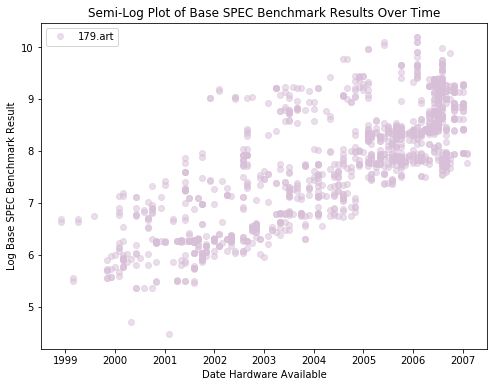

In [4]:
# semi-log plot (linear x-axis, log y-axis)
plt.figure(figsize=(8,6))
plt.plot(df2['hwAvail'], np.log(df2['base_x']), 'o', 
         color='thistle', label='179.art', alpha=0.5)

plt.title('Semi-Log Plot of Base SPEC Benchmark Results Over Time')
plt.xlabel('Date Hardware Available')
plt.ylabel('Log Base SPEC Benchmark Result')

plt.legend(loc=2)
plt.show()

3. *Now train a linear model to fit your plot.*

In [5]:
from sklearn.linear_model import LinearRegression

# change dates to ordinal for calculations
X = df2['hwAvail']
X = X.map(datetime.datetime.toordinal)
X = np.array(X.values)
X = X.reshape(-1,1)

y = df2['base_x']

# split into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.4, random_state=0)

# apply linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# get predicted results from testing set
y_pred = model.predict(X_test)

print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_}')

Intercept: -2303499.7132550175
Coefficient: [3.15383274]


In [6]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

# calculate metrics
MSE = np.round(mean_squared_error(y_test, y_pred),2)
MAS = np.round(mean_absolute_error(y_test, y_pred),2)
MAE = np.round(median_absolute_error(y_test, y_pred),2)
R_2 = np.round(r2_score(y_test, y_pred),3)

print(f'MSE: {MSE}')
print(f'MAS: {MAS}')
print(f'Median Absolute Error: {MAE}')
print(f'R^2: {R_2}')

MSE: 9459218.63
MAS: 2374.98
Median Absolute Error: 1985.32
R^2: 0.243


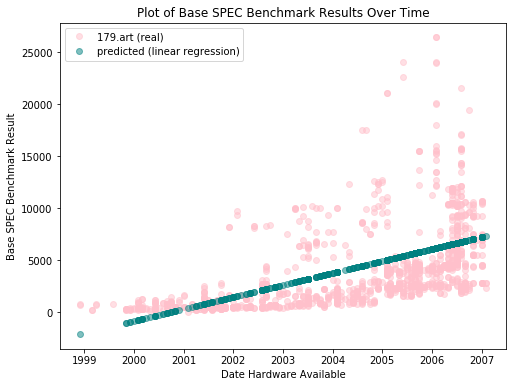

In [7]:
plt.figure(figsize=(8,6))

# original plot (linear x-axis, log y-axis)
plt.plot(df2['hwAvail'], df2['base_x'], 'o', 
         color='pink', label='179.art (real)', alpha=0.5)

# predicted plot (linear x-axis, log y-axis)
plt.plot(X_test, y_pred, 'o', 
         color='teal', label='predicted (linear regression)', 
         alpha=0.5)

plt.title('Plot of Base SPEC Benchmark Results Over Time')
plt.xlabel('Date Hardware Available')
plt.ylabel('Base SPEC Benchmark Result')

plt.legend(loc=2)
plt.show()

4. *How well is Moore's Law holding up?*

Moore's Law states that the score should double every two years, which loosely aligns with the data seen in the graph above for the art.179 benchmark between 1999 and 2007. The linear regression model predicted a slight upward trend ($R^2 = 0.243$), and the base score *approximately* doubled every two years. Additionally, the error values were somewhat high, possibly due to the various outliers seen above the regression line.

**Year : Approx. Base Score**

1999 : 100s

2001 : 100s

2003 : ~2500

2005 : ~5000

2007 : ~7500

## 2. MNIST Digits
1. *Using scikit-learn, load the MNIST digits.*

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


2. *Plot some of the examples.*

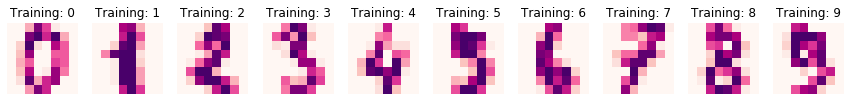

In [9]:
# plot numbers 0-9
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 5))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.RdPu, interpolation='nearest')
    ax.set_title('Training: %i' % label)

3. *Choose two digit classes (e.g. 7s and 3s), and train a k-nearest neighbor classifier.*

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

# define data
X = digits.data[np.logical_or(digits.target == 1, 
                              digits.target ==7)]
y = digits.target[np.logical_or(digits.target == 1, 
                                digits.target ==7)]


# split into train and test data
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.5, random_state=0)

# apply k-nearest-neighbors classification model
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)

# get predicted results
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        80
           7       1.00      1.00      1.00       101

    accuracy                           1.00       181
   macro avg       1.00      1.00      1.00       181
weighted avg       1.00      1.00      1.00       181



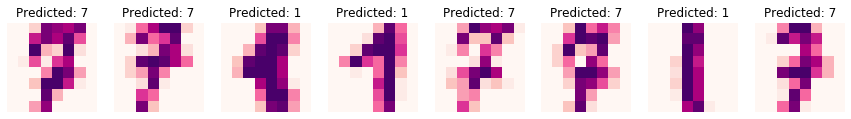

In [11]:
# plot samples of predictions for numbers 1 & 7
_, axes = plt.subplots(nrows=1, ncols=8, figsize=(15, 5))
for ax, image, label in zip(axes, X_test, y_pred):
    image = image.reshape(8, 8)
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.RdPu, interpolation='nearest')
    ax.set_title('Predicted: %i' % label)

*Report your error rates on a held out part of the data.*

In [12]:
# calculate error rate
accuracy_rate = accuracy_score(y_test, y_pred, normalize = True)
error_rate = np.round(1 - accuracy_rate, 3)
print(f'Error Rate: {error_rate}')

Error Rate: 0.0


<Figure size 432x288 with 0 Axes>

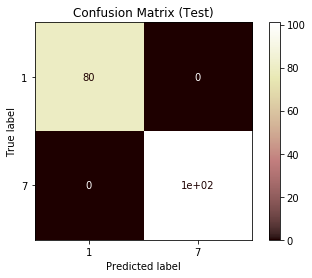

<Figure size 432x288 with 0 Axes>

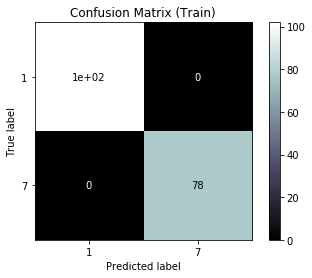

In [13]:
# plot confustion matrices

# test data
plt.figure()
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.pink)
plt.title('Confusion Matrix (Test)')
plt.show()

# train data
plt.figure()
plot_confusion_matrix(model, X_train, y_train, cmap=plt.cm.bone)
plt.title('Confusion Matrix (Train)')
plt.show()

### (optional) 
*Test your model on the full dataset.*

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

# define data
X = digits.data
y = digits.target

# split into train and test data
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.5, random_state=0)

# apply k-nearest-neighbors classification model
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)

# get predicted results
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0.92      1.00      0.96        90
           2       0.99      0.99      0.99        92
           3       0.94      0.99      0.96        93
           4       0.99      0.97      0.98        76
           5       0.96      0.96      0.96       108
           6       0.99      1.00      0.99        89
           7       1.00      1.00      1.00        78
           8       1.00      0.91      0.95        92
           9       0.99      0.93      0.96        92

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899



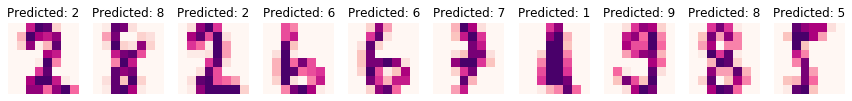

In [15]:
# plot samples of predictions for all numbers
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 5))
for ax, image, label in zip(axes, X_test, y_pred):
    image = image.reshape(8, 8)
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.RdPu, interpolation='nearest')
    ax.set_title('Predicted: %i' % label)

In [16]:
# calculate error rate
accuracy_rate = accuracy_score(y_test, y_pred, normalize = True)
error_rate = np.round(1 - accuracy_rate, 3)
print(f'Error Rate: {error_rate}')

Error Rate: 0.024


<Figure size 432x288 with 0 Axes>

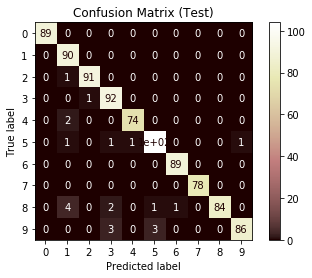

<Figure size 432x288 with 0 Axes>

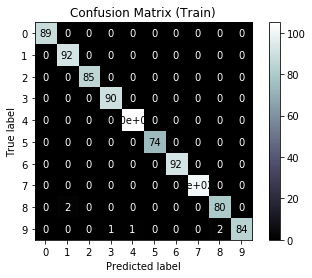

In [17]:
# plot confustion matrices

# test data
plt.figure()
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.pink)
plt.title('Confusion Matrix (Test)')
plt.show()

# train data
plt.figure()
plot_confusion_matrix(model, X_train, y_train, cmap=plt.cm.bone)
plt.title('Confusion Matrix (Train)')
plt.show()